# 0. Import Packages and Load Data Sets/ Explore Data Sets

* Load necessary python package and CSV file needed for tasks. Initial check up on data structure

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from functools import reduce
from scipy import stats
from functions import *
import pandas as pd
import seaborn as sns


data = pd.read_csv("notes.csv")  
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [2]:
data.describe()

# std for length and margin_low tell there are great variance, it will be worth looking at further the reason why?

,diagonal,height_left,height_right,margin_low,margin_up,length
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500
max,173.010000,104.860000,104.950000,6.280000,3.680000,113.980000


* Check how many True and False values are there - it wil be used to check if prediction model is good enough or not on task 4 later on 

In [3]:
data.is_genuine.value_counts()

True     100
False     70
Name: is_genuine, dtype: int64

* Check if there are NA value in data

In [4]:
data.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

* Filter data with correct value(only posivie numbers)

In [5]:
data=data[(data['diagonal']>0) & (data['height_left']>0) & (data['height_right']>0) & (data['margin_low']>0) & (data['margin_up']>0) &(data['length']>0) ]
data

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


Handle and remove outliers

In [6]:
cols = ['diagonal', 'height_left', 'height_right', 'margin_low','margin_up', 'length'] # one or more

Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]



# 1. Task : Perform Univariate and Multivariate Analysis on Data Sets - Describe Data 

## 1.1 Visualzation of All Variables Using Pairplot

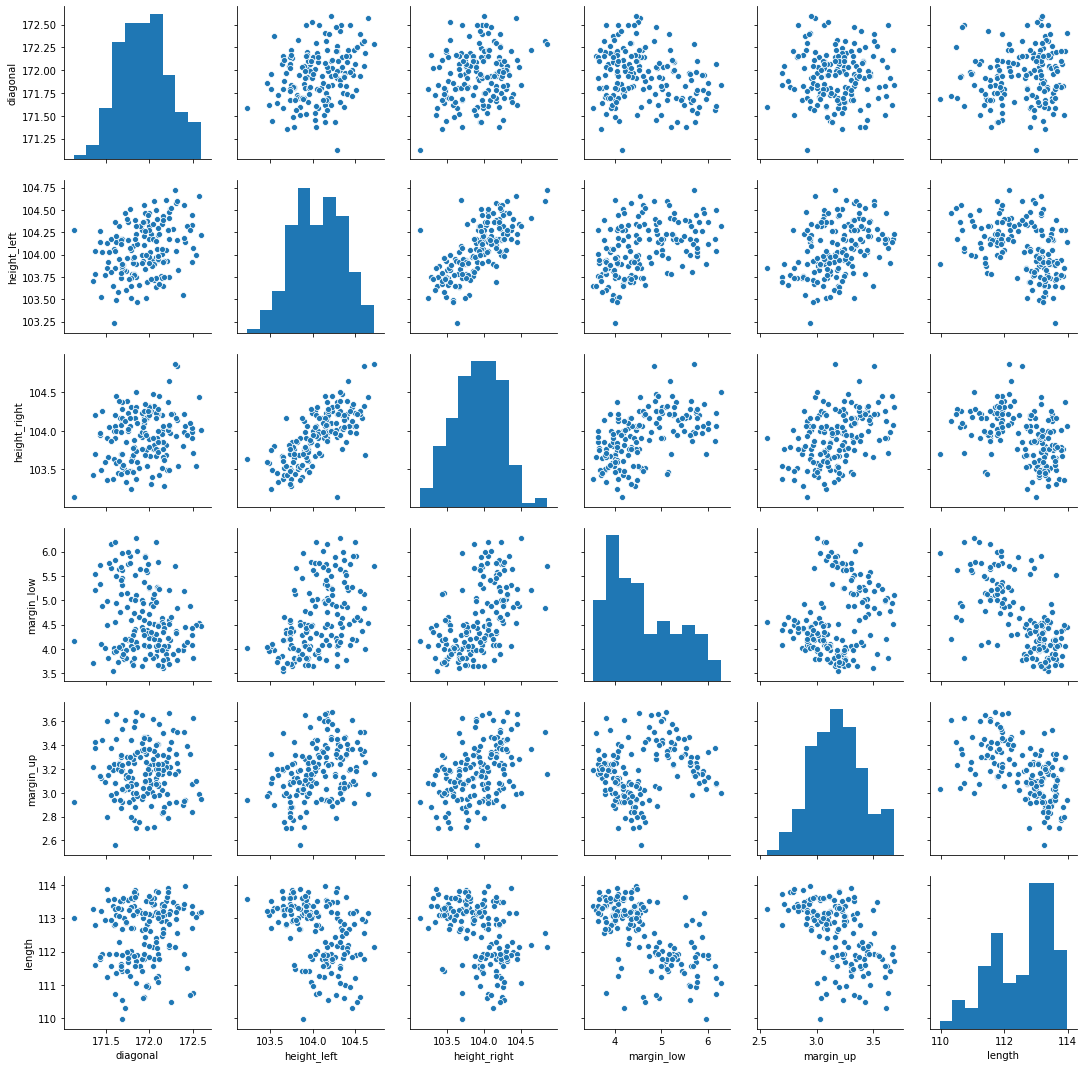

In [7]:
# Create the default pairplot
sns.pairplot(data.loc[:, "diagonal":"length"])

In [8]:
# It seems length, margin_low do not have even distribution => will look in details in univariate visualization.
# Given visualization, it seems there is correlation between height_left and height_right => will look in details in multivariabe visualization.


## 1.2 Distribution plot and variable length and height - univariate analysis 

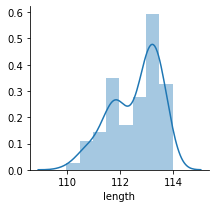

In [9]:
sns.FacetGrid(data).map(sns.distplot,"length").add_legend()

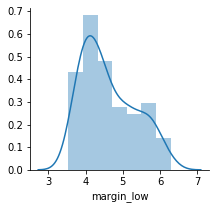

In [10]:
sns.FacetGrid(data).map(sns.distplot,"margin_low").add_legend()

## 1.3 Multivariate Visualizaions

* Creating boxplot authenticity VS height right

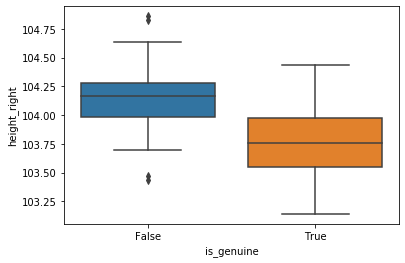

In [11]:
sns.boxplot(x='is_genuine',y='height_right',data=data)
plt.show()

* Creating boxplot authenticity VS height left

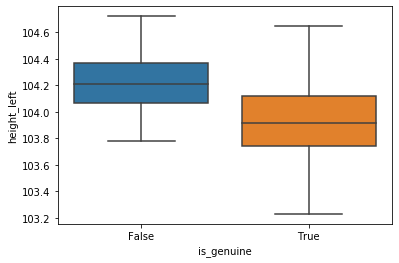

In [12]:
sns.boxplot(x='is_genuine',y='height_left',data=data)
plt.show()

* Creating boxplot authencity VS length

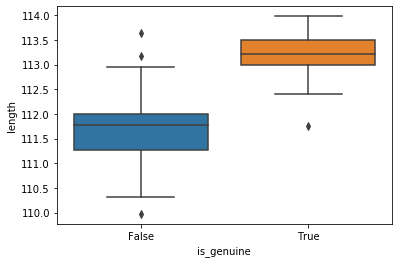

In [13]:
sns.boxplot(x='is_genuine',y='length',data=data)
plt.show()

* Creating boxplot authencity VS margin_low

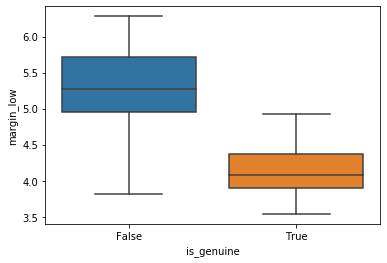

In [14]:
sns.boxplot(x='is_genuine',y='margin_low',data=data)


# 2. Task: Carry out Principle Component Analysis(PCA)

## 2.1 Analyzing eigenvalues scree plot

* Load data needed and filter out only data needed

In [15]:
X=data.drop(columns=["is_genuine"]).values

* Standardising the data and check the range of values for the variables we have.

In [16]:
#data reduction
std_scaler=preprocessing.StandardScaler()
std_scaler.fit(X)
X_scaled=std_scaler.transform(X)

In [17]:
#PCA for individual factorial planes
pca=decomposition.PCA(n_components=6)
pca.fit(X_scaled)
X_projected=pca.transform(X_scaled)

* Explained Variance Ratio

In [18]:

pca.explained_variance_ratio_

array([0.48396128, 0.22147223, 0.13673628, 0.07823102, 0.04861994,
       0.03097925])

In [19]:

pca.explained_variance_ratio_.cumsum()

array([0.48396128, 0.70543351, 0.84216979, 0.92040081, 0.96902075,
       1.        ])

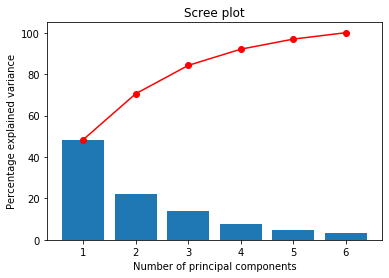

In [20]:
display_scree_plot(pca)

# It seems with one variable we could explain almost 50% of varian and when it gets two 70% and lastly three more than 80%


Component Score

In [21]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]
pc3 = pca.components_[2]

In [22]:
data.loc[:, "diagonal":"length"].columns

Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length'],
      dtype='object')

In [23]:
pc1

array([ 0.05070119,  0.46655538,  0.48831428,  0.43381103,  0.37250129,
       -0.46298533])

In [24]:
pc2

array([ 0.79152506,  0.32884729,  0.2306992 , -0.34068715, -0.04395454,
        0.30679911])

## 2.2 Correlation Circle

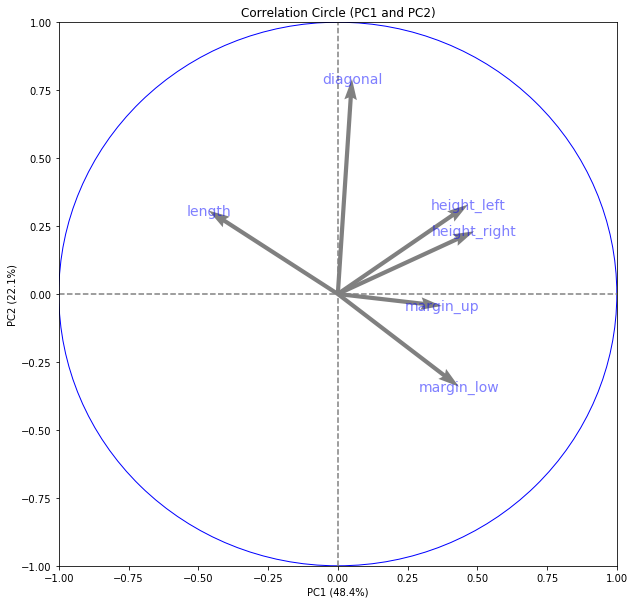

In [25]:
number_of_variables=data.columns[1:7]
pcs=pca.components_
display_circles(pcs,6,pca,[(0,1)],
                labels=number_of_variables)


#analysis of correlations cricles:
#diagonal seems best represented, highly correlated.
#height and margin seem to be correlated with each other but weakly with the F1 axis.
#also there is negative correlation of the length. 


## 2.3 K-means clustering

In [26]:
# Import the kmeans algorithm
from sklearn.cluster import KMeans


# Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=2, n_init=10)

# Fit the data to the model
kmeans.fit(X_scaled)

# Determine which clusters each data point belongs to:
clusters =  kmeans.predict(X_scaled)

In [27]:
K_mean_data=data.loc[:, "diagonal":"length"]
K_mean_data

,diagonal,height_left,height_right,margin_low,margin_up,length
1,171.67,103.74,103.70,4.01,2.87,113.29
2,171.83,103.76,103.76,4.40,2.88,113.84
3,171.80,103.78,103.65,3.73,3.12,113.63
5,172.57,104.65,104.44,4.54,2.99,113.16
6,172.38,103.55,103.80,3.97,2.90,113.30
...,...,...,...,...,...,...
164,171.43,104.26,103.97,5.73,3.14,111.82
165,172.11,104.23,104.45,5.24,3.58,111.78
167,172.47,104.27,104.10,4.88,3.33,110.68
168,171.82,103.97,103.88,4.73,3.55,111.87


In [28]:

# Add cluster number to the original data
X_scaled_clustered = pd.DataFrame(X_scaled, columns=K_mean_data.columns, index=K_mean_data.index)
X_scaled_clustered['cluster'] = clusters

X_scaled_clustered.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,cluster
1,-0.937727,-1.105297,-0.688131,-0.849612,-1.354645,0.781990,0
2,-0.371098,-1.036294,-0.502302,-0.298755,-1.310568,1.378389,0
3,-0.477341,-0.967291,-0.842988,-1.245099,-0.252710,1.150673,0
5,2.249556,2.034323,1.603761,-0.101012,-0.825716,0.641023,1
6,1.576686,-1.760822,-0.378416,-0.906110,-1.222413,0.792834,0


In [29]:
from sklearn.decomposition import PCA

# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(X_scaled)

In [30]:
# Convert to a data frame
X_reduceddf = pd.DataFrame(X_reduced, index=K_mean_data.index, columns=['PC1','PC2'])
X_reduceddf['cluster'] = clusters
X_reduceddf.head()

,PC1,PC2,cluster
1,-2.134478,-0.675550,0
2,-2.003550,-0.168121,0
3,-2.054158,-0.102073,0
5,1.198134,3.086921,1
6,-2.141868,1.187316,0


In [31]:
centres_reduced = pca.transform(kmeans.cluster_centers_)

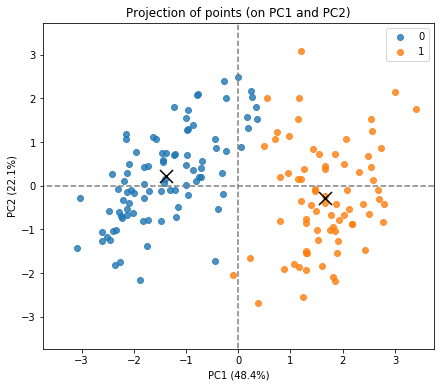

In [32]:
display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)
plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='x', s=169, linewidths=3,
            color='k', zorder=10)

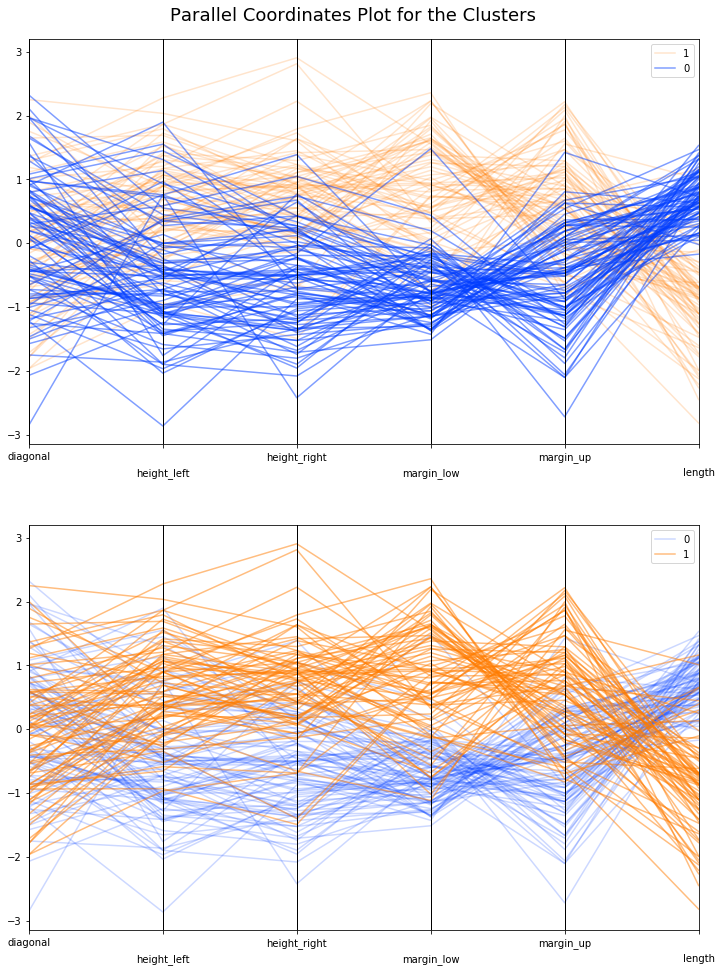

In [33]:

# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(X_scaled, index=K_mean_data.index, columns=K_mean_data.columns)
X_clustered["cluster"] = clusters

# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(X_clustered, 2)

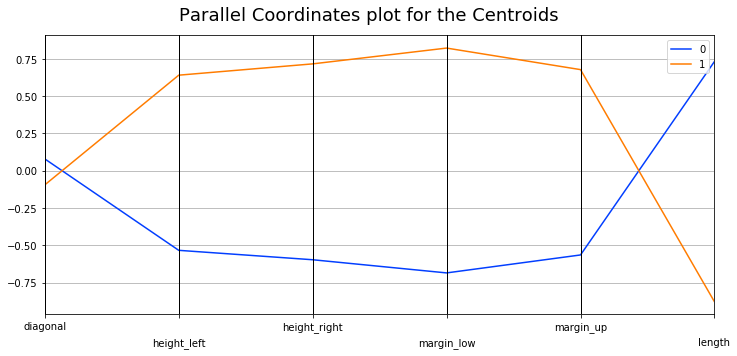

In [34]:
# Create a data frame containing our centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=K_mean_data.columns)
centroids['cluster'] = centroids.index

display_parallel_coordinates_centroids(centroids, 10)

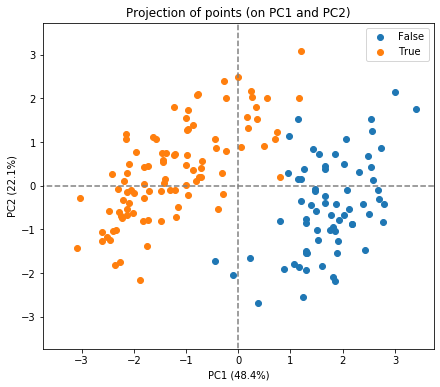

In [35]:
display_factorial_planes(X_projected,6,pca,[(0,1)],
                         illustrative_var=data.is_genuine)

# 3. Task: Classification Algorithm(K-means clsutering)

Apply a classification algorithm and analyze the result. Visualize the resulting scores in the first factorial plane of the PCA and analyze them.

In [36]:
# Import the sklearn function
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-9.37726522e-01, -1.10529663e+00, -6.88130698e-01,
        -8.49612252e-01, -1.35464503e+00,  7.81989912e-01],
       [-3.71098457e-01, -1.03629401e+00, -5.02301622e-01,
        -2.98755341e-01, -1.31056764e+00,  1.37838948e+00],
       [-4.77341219e-01, -9.67291379e-01, -8.42988260e-01,
        -1.24509927e+00, -2.52710353e-01,  1.15067328e+00],
       [ 2.24955635e+00,  2.03432292e+00,  1.60376123e+00,
        -1.01011835e-01, -8.25716385e-01,  6.41022742e-01],
       [ 1.57668552e+00, -1.76082160e+00, -3.78415572e-01,
        -9.06110397e-01, -1.22241287e+00,  7.92833541e-01],
       [-1.25645481e+00, -1.41580846e+00, -1.71019061e+00,
        -1.51346545e+00,  5.58313570e-02,  8.79582569e-01],
       [ 8.92868467e-02, -1.89882685e+00, -5.33273135e-01,
        -7.78989571e-01,  6.72914777e-01,  1.04223700e+00],
       [ 7.26743420e-01,  9.64782192e-01,  8.60444931e-01,
         2.61089911e-02, -6.93484224e-01, -1.07187625e-01],
       [ 1.18712872e+00,  7.92275623e-01,  9.223

Perform K Means clustering

In [37]:
# Import the kmeans algorithm
from sklearn.cluster import KMeans

# Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=2, n_init=10)

# Fit the data to the model
kmeans.fit(X_scaled)

# Determine which clusters each data point belongs to:
clusters =  kmeans.predict(X_scaled)

clusters

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [38]:
data_without_is_genuine=data.drop(columns=["is_genuine"])
data_without_is_genuine

,diagonal,height_left,height_right,margin_low,margin_up,length
1,171.67,103.74,103.70,4.01,2.87,113.29
2,171.83,103.76,103.76,4.40,2.88,113.84
3,171.80,103.78,103.65,3.73,3.12,113.63
5,172.57,104.65,104.44,4.54,2.99,113.16
6,172.38,103.55,103.80,3.97,2.90,113.30
...,...,...,...,...,...,...
164,171.43,104.26,103.97,5.73,3.14,111.82
165,172.11,104.23,104.45,5.24,3.58,111.78
167,172.47,104.27,104.10,4.88,3.33,110.68
168,171.82,103.97,103.88,4.73,3.55,111.87


In [39]:

# Add cluster number to the original data
X_scaled_clustered = pd.DataFrame(X_scaled, columns=data_without_is_genuine.columns, index=data_without_is_genuine.index)
X_scaled_clustered['cluster'] = clusters

X_scaled_clustered.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,cluster
1,-0.937727,-1.105297,-0.688131,-0.849612,-1.354645,0.781990,0
2,-0.371098,-1.036294,-0.502302,-0.298755,-1.310568,1.378389,0
3,-0.477341,-0.967291,-0.842988,-1.245099,-0.252710,1.150673,0
5,2.249556,2.034323,1.603761,-0.101012,-0.825716,0.641023,1
6,1.576686,-1.760822,-0.378416,-0.906110,-1.222413,0.792834,0


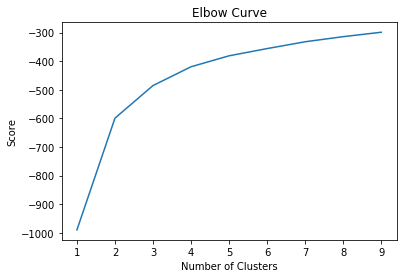

In [40]:

# Run a number of tests, for 1, 2, ... num_clusters
num_clusters = 10
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1, num_clusters)]
score = [kmeans_tests[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans_tests))]

# Plot the curve
plt.plot(range(1, num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [41]:

from sklearn.decomposition import PCA

# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(X_scaled)

In [42]:

# Convert to a data frame
X_reduceddf = pd.DataFrame(X_reduced, index=data_without_is_genuine.index, columns=['PC1','PC2'])
X_reduceddf['cluster'] = clusters
X_reduceddf.head()

,PC1,PC2,cluster
1,-2.134478,-0.675550,0
2,-2.003550,-0.168121,0
3,-2.054158,-0.102073,0
5,1.198134,3.086921,1
6,-2.141868,1.187316,0


In [43]:
centres_reduced = pca.transform(kmeans.cluster_centers_)

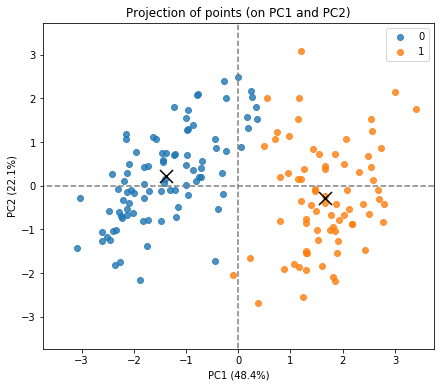

In [44]:
display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var = clusters, alpha = 0.8)


plt.scatter(centres_reduced[:, 0], centres_reduced[:, 1],
            marker='x', s=169, linewidths=3,
            color='k', zorder=10)

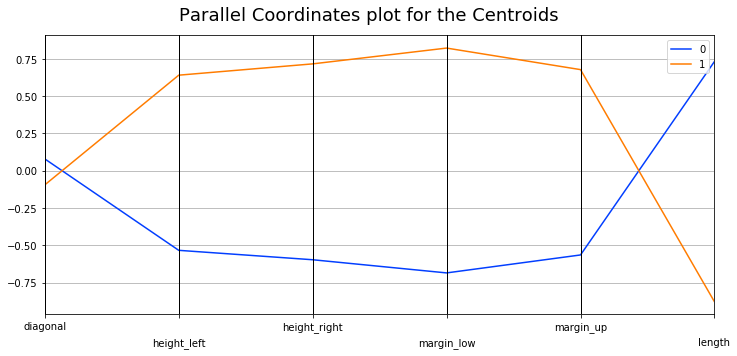

In [45]:
#create a data frame containing our centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=data_without_is_genuine.columns)
centroids['cluster'] = centroids.index

display_parallel_coordinates_centroids(centroids, 10)

# 4. Task: Data Modelling - Selecting Logistic Regression Model 

Classification is a very important area of supervised machine learning. \
A large number of important machine learning problems fall within this area.\
There are many classification methods, and logistic regression is one of them and we will use logistic regression to build up data model


# 4.1 Build up Logistic Regression Model

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

model_log_reg=linear_model.LogisticRegression()

In [47]:
#logistic regression model:https://realpython.com/logistic-regression-python/
X_model=data.reset_index()
X_model

,index,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,True,171.67,103.74,103.70,4.01,2.87,113.29
1,2,True,171.83,103.76,103.76,4.40,2.88,113.84
2,3,True,171.80,103.78,103.65,3.73,3.12,113.63
3,5,True,172.57,104.65,104.44,4.54,2.99,113.16
4,6,True,172.38,103.55,103.80,3.97,2.90,113.30
...,...,...,...,...,...,...,...,...
160,164,False,171.43,104.26,103.97,5.73,3.14,111.82
161,165,False,172.11,104.23,104.45,5.24,3.58,111.78
162,167,False,172.47,104.27,104.10,4.88,3.33,110.68
163,168,False,171.82,103.97,103.88,4.73,3.55,111.87


In [48]:
X=data.loc[:,"diagonal":"length"].values
y=data.is_genuine.values

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.25, random_state=42)


In [50]:
#applying scaling on training and test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform (X_test)

In [51]:
#importing logistic regression model
from sklearn.linear_model import LogisticRegression
 
#training the logistic regression model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
 
#making predicions on test set
y_pred = classifier.predict(X_test)
y_pred

C:\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([False, False, False,  True,  True,  True, False,  True, False,
       False,  True,  True,  True, False,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
        True, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False])

In [52]:
#test accuracy
print(accuracy_score(y_test, y_pred))

0.9761904761904762


In [54]:
model_log_reg.fit(X,y)

C:\Python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# 4.2 Analysis on model

In [55]:
confusion_matrix(y, model_log_reg.predict(X))

array([[68,  1],
       [ 1, 95]], dtype=int64)

In [56]:
model_log_reg.score(X,y)

0.9878787878787879

In [57]:
model_log_reg.coef_

array([[-0.20740513, -0.68400192, -1.19504868, -2.75217166, -1.39574819,
         2.21086454]])

# 4.3 Verficiation(Evaluation) on Model

In [58]:
#https://bytescout.com/blog/detecting-fake-currency-notes-via-machine-learning.html

#def verif_notes(csv):
    #notes=pd.read_csv(csv)
    #id_notes=notes["id"]
    #notes_val=notes.loc[:,"diagonal":"length"].values
    #predictions=model_log_reg.predict_proba(notes_val)
    #for i in range (len(notes)):
        #print("billets {} :the probability that notes are genuine = {}%".format(id_notes[i],round(((predictions[i][1])*100),2)))

In [71]:
#https://bytescout.com/blog/detecting-fake-currency-notes-via-machine-learning.html
#https://thecleverprogrammer.com/2020/09/29/fake-currency-detection-with-machine-learning/
#applying scaling on training and test data

def verification(csv):
 new_banknote=pd.read_csv(csv)
 new_banknote = scaler.transform(new_banknote.loc[:,"diagonal":"length"])
 for i in range(len(new_banknote)):
  print(f'Prediction:  Class{classifier.predict(new_banknote)[i]}')
  print(f'Probability [0/1]:  {classifier.predict_proba(new_banknote)[i]}')
    

In [72]:
verification('example.csv')

Prediction:  ClassFalse
Probability [0/1]:  [0.97656864 0.02343136]
Prediction:  ClassFalse
Probability [0/1]:  [0.99626092 0.00373908]
Prediction:  ClassFalse
Probability [0/1]:  [0.98661183 0.01338817]
Prediction:  ClassTrue
Probability [0/1]:  [0.03309812 0.96690188]
Prediction:  ClassTrue
Probability [0/1]:  [0.00875636 0.99124364]


In [ ]:
#verif_notes('example.csv')

In [ ]:
pd.read_csv("example.csv",index_col="id")